In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

*load the dataset*

In [5]:
df = pd.read_csv('application_data.csv')

*first 5 records of the data*

In [6]:
pd.set_option("display.max_columns", None)
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

shape of the data

In [7]:
df.shape

(307511, 122)

*getting all the column headings*

In [8]:

df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [10]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

SK_ID_CURR is the current Id's so the mean,median etc. doesn't make any sense.
Target is a categorical data hence 25%-50%-75% aren't appropriate


Only 25% of clients  live in highly populated region

We can see that the mean of DAYS_BIRTH column is negative so let's convert the days into years and change the -sign to + snd then see what happens.

In [12]:
df.loc[:,'AGE'] = ((df.DAYS_BIRTH)*(-1))/365   ###created a new column named AGE###

In [13]:
df.drop('DAYS_BIRTH',axis = 1,inplace = True)  ###removed the column named DAYS_BIRTH as we have created the column AGE###

In [14]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.04459

In [15]:
df.DAYS_EMPLOYED.value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [16]:
df.DAYS_EMPLOYED[df.DAYS_EMPLOYED > 0].value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

This shows us that some of the entries(55374 no. of entries) in the DAYS_EMPLOYED column are positive and all of them have same value i.e 365243 and acc. to our intuition all the entries of this column must be negative.

In [17]:
(55374/df.shape[0])*100  ###i.e 18% of the entries of days_employed column seems to be improper###

18.00716071945394

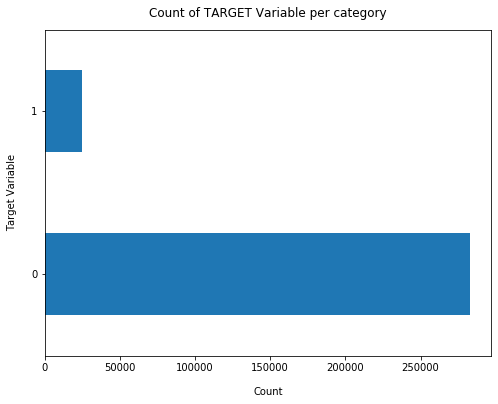

In [18]:
df['TARGET'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [19]:
100*df['TARGET'].value_counts()/len(df['TARGET'])

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [20]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Data is highly imbalanced 92:8

In [21]:
df.info(verbose=True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

We can see that some of the columns have some null values

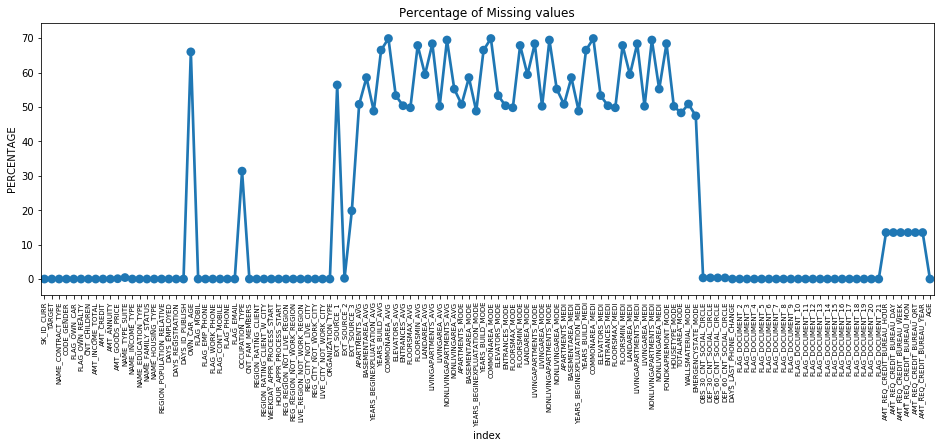

In [22]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [23]:
((df.OWN_CAR_AGE.isnull().value_counts())/len(df.OWN_CAR_AGE))*100

True     65.99081
False    34.00919
Name: OWN_CAR_AGE, dtype: float64

We can see more than 50% of the data is null but this column is dependent on flag_own_car column

In [24]:
((df.FLAG_OWN_CAR.value_counts())/len(df.FLAG_OWN_CAR))*100

N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64

From this we observed that OWN_CAR_AGE column is empty bcz of more no. of clients not having a car

Let's create a copy of the dataset 

In [25]:
df_copy = df.copy()


Let's fill the NA's in own_car_age column with 'NO CAR' as these values are missing because that client doesn't have a car 

In [26]:
df_copy.OWN_CAR_AGE.fillna('NO CAR',inplace=True)

let's delete the columns that have more than 50% of missing data as we already have sufficient columns to get the insight

In [27]:
df_cols = df_copy.loc[:,((df_copy.isnull().sum())*100)/df_copy.shape[0] > 50] 
cols = df_cols.columns

In [28]:
df_copy.drop(cols,axis = 1,inplace=True)

In [29]:
df_copy.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOO

Let's remove columns which doesn't seem important

In [30]:
dropcolumns = ['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI','EXT_SOURCE_2', 'EXT_SOURCE_3', 'REGION_RATING_CLIENT','EMERGENCYSTATE_MODE']
df_copy.drop(dropcolumns,axis=1,inplace=True)

In [31]:
(df_copy.isnull().sum()/df_copy.shape[0])*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

Now as we can see AMT_ANNUITY has lesser number of null values so let's try to fill those values

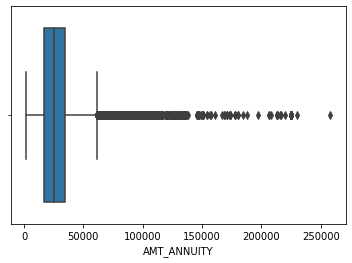

In [32]:
sns.boxplot(x='AMT_ANNUITY',data=df_copy)       ##checking for the outliers###

We've seen that there are many outliers so we cannot use mean to impute the missing values. Let's go with median

In [33]:
df_copy['AMT_ANNUITY'].fillna(df_copy.AMT_ANNUITY.median(),inplace=True)

Moving to the next column with null values AMT_GOODS_PRICE

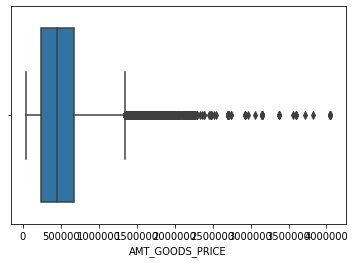

In [34]:
sns.boxplot(x='AMT_GOODS_PRICE',data=df_copy)       ###checking for the presence of outliers###

In [35]:
median = df_copy.AMT_GOODS_PRICE.median()
df_copy.AMT_GOODS_PRICE.fillna(median,inplace=True)

Moving to NAME_SUIT_TYPE column

In [36]:
df_copy.NAME_TYPE_SUITE.value_counts()   ###this is a categorical column so let's fill the missing values with mode##

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [37]:
df_copy.NAME_TYPE_SUITE.fillna(df_copy.NAME_TYPE_SUITE.mode(),inplace=True)

Moving to occupation type column

In [38]:
df_copy.OCCUPATION_TYPE.value_counts()  ###this is also a categorical data so let's fill the missing values with mode##

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [39]:
df_copy.OCCUPATION_TYPE.fillna(df_copy.OCCUPATION_TYPE.mode(),inplace=True)

Moving to TOTALAREA_MODE column

As we can see that the data in this column are missing completely at random so we can use mean/median. But let's check for outliers first

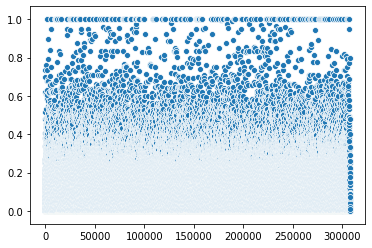

In [40]:
sns.scatterplot(data=df_copy.TOTALAREA_MODE)       ##not able to check whether or not outliers are present,let's plot violin plot##

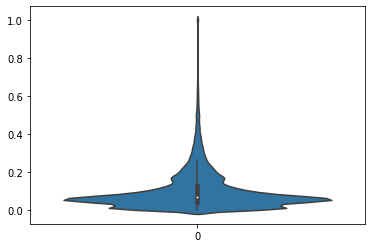

In [41]:
sns.violinplot(data=df_copy.TOTALAREA_MODE)

We can see that there are many outliers so using median to replace the missing values


In [42]:
df_copy.TOTALAREA_MODE.fillna(df_copy.TOTALAREA_MODE.median(),inplace=True)

We can see that CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE have very less percentage of missing values ie.0.0006 and 0.0003 so let's drop these

In [43]:
df_copy['CNT_FAM_MEMBERS'].dropna(how='any',inplace = True)

In [44]:
df_copy['DAYS_LAST_PHONE_CHANGE'].dropna(how='any',inplace = True)

In [45]:
df_copy.CODE_GENDER.value_counts() 

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

We can see that there are 4 values in code_gender column which have been filled by XNA so replacing them with their mode

In [46]:
df_copy['CODE_GENDER'].loc[df_copy['CODE_GENDER']=='XNA'] = df_copy.CODE_GENDER.mode()

C:\Users\Kadambini sinha\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [47]:
df_copy.nunique().sort_values()

FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_NOT_WORK_REGION         2
REG_REGION_NOT_WORK_REGION          2
REG_REGION_NOT_LIVE_REGION          2
FLAG_EMAIL                          2
FLAG_WORK_PHONE                     2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_CONT_MOBILE                    2
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REGION_RATING_CLIENT_W_CITY         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CRED

In [48]:
df_copy.AMT_INCOME_TOTAL

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

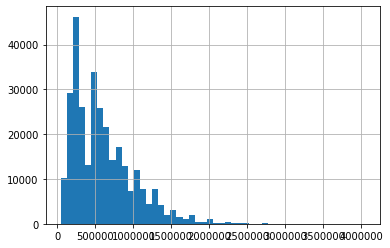

In [49]:
df_copy.AMT_CREDIT.hist(bins=50)        ###this shows it is right skewed### 

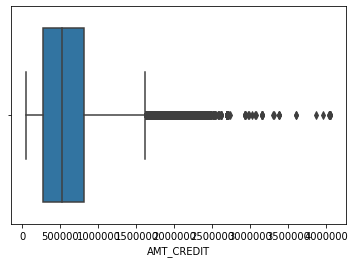

In [50]:
sns.boxplot(df_copy.AMT_CREDIT)

In [51]:
df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

# Univariate Analysis

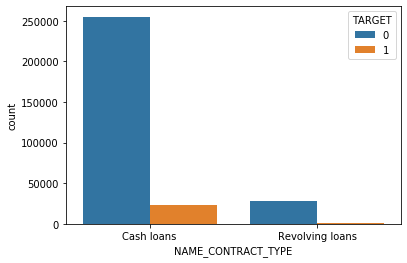

In [52]:
sns.countplot(x=df_copy['NAME_CONTRACT_TYPE'],hue=df_copy['TARGET'])

We can see that the ones with cash loans are having difficulties in paying it compared to revolving loans but it might be because the total % of revolving loans are lesser as compared to cash loans. So, let's check it first.

In [53]:
###replacing cash loans with 0 and revolving loans with 1###
df_copy.loc[:,'NAME_CONTRACT_TYPE'] = np.where(df['NAME_CONTRACT_TYPE'] == 'Cash loans',0,1)

In [70]:
df_copy['NAME_CONTRACT_TYPE'].value_counts()

0    278232
1     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

([<matplotlib.patches.Wedge at 0x202b744eac8>,
 [Text(-1.051155770589415, 0.3241474139285599, 'Cash loans'),
  Text(1.0511557478277591, -0.32414748774078894, 'Revolving loans')],
 [Text(-0.5733576930487718, 0.176807680324669, '90.5%'),
  Text(0.573357680633323, -0.17680772058588484, '9.5%')])

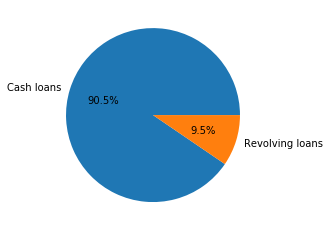

In [55]:
LABELS = ['Cash loans','Revolving loans']
plt.pie(list(df_copy['NAME_CONTRACT_TYPE'].value_counts()),labels=LABELS,autopct='%1.1f%%')

In [56]:
df_copy['NAME_CONTRACT_TYPE'].groupby(df_copy['TARGET']).value_counts()

TARGET  NAME_CONTRACT_TYPE
0       0                     255011
        1                      27675
1       0                      23221
        1                       1604
Name: NAME_CONTRACT_TYPE, dtype: int64

Since the percentages of cash and revolving loans do not alter so this might not be a valuable insight

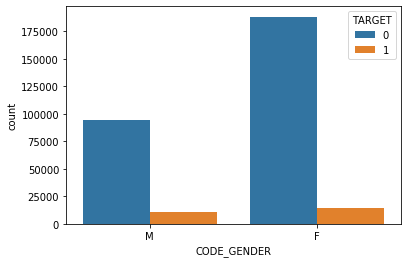

In [57]:
sns.countplot(x=df_copy['CODE_GENDER'],hue=df_copy['TARGET'])

In [63]:
df_copy['CODE_GENDER'].groupby(df_copy['TARGET']).value_counts()

TARGET  CODE_GENDER
0       F              188278
        M               94404
1       F               14170
        M               10655
Name: CODE_GENDER, dtype: int64

In [72]:
t1_percentage = df_copy[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
t1_percentage

,CODE_GENDER,TARGET
0,F,0.069993
1,M,0.101419


([<matplotlib.patches.Wedge at 0x202cc9c8208>,
 [Text(-0.5249328265078961, 0.966667226947532, 'F'),
  Text(0.524932826507896, -0.966667226947532, 'M')],
 [Text(-0.2863269962770342, 0.527273032880472, '65.8%'),
  Text(0.2863269962770341, -0.527273032880472, '34.2%')])

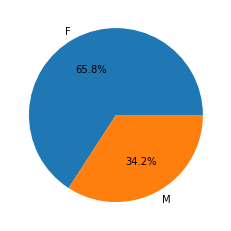

In [61]:
plt.pie(list(df_copy['CODE_GENDER'].value_counts()),labels=['F','M'],autopct='%1.1f%%')

In [109]:
print((14170/202452)*100) , print((10655/105059)*100)    ##printing the % of females having difficulty paying  the loan vs males##

6.999189931440538
10.141920254333279


(None, None)

Insight: Higher percentage of males will be having difficulty in paying the loans

Instead of doing it one by one for all the columns let's create a function and use that for all the columns

In [110]:
def plot_univariate(feature,label_rotation=False,horizontal_layout=True):
    temp = df_copy[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'absolute values': temp.values})
    
    t1_percentage = df_copy[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    t1_percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    s = sns.barplot(ax=ax1,x = feature, y="absolute values",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2,x = feature, y='TARGET', order=t1_percentage[feature], data=t1_percentage)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('% of applications where loans were NOT repayed', fontsize=10)
    #plt.tick_params(axis='both', which='major', labelsize=10)
    #plt.subplots_adjust(wspace = .6)

    plt.show();

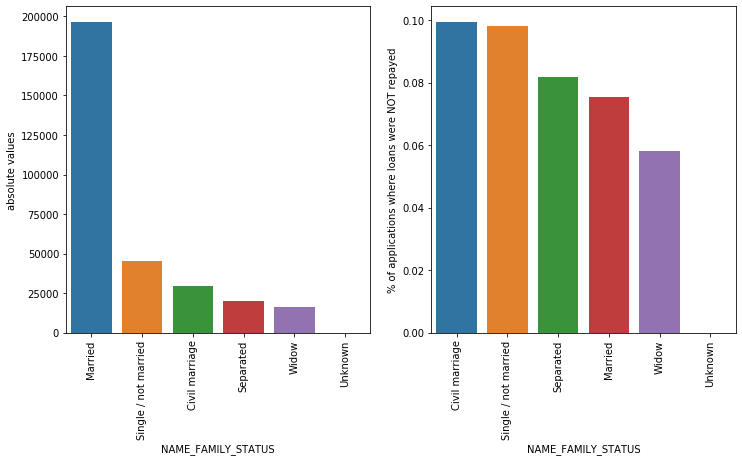

In [111]:
plot_univariate('NAME_FAMILY_STATUS',True,True)

Insight: Civil marriage people and singles have higher chances of having difficulty in repaying the loan 

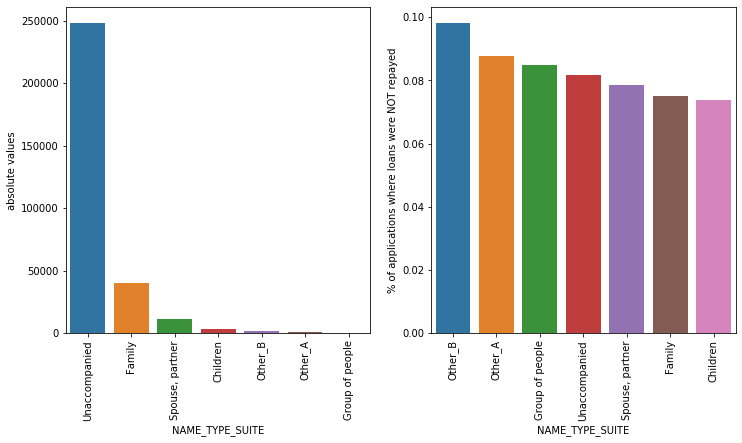

In [114]:
plot_univariate('NAME_TYPE_SUITE',True,True)

In [128]:
df_copy['NAME_TYPE_SUITE'].value_counts()/df_copy.shape[0]

Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

In [125]:
df_copy[df_copy['TARGET']==1]['NAME_TYPE_SUITE'].value_counts()/len(df_copy[df_copy['TARGET']==1]['NAME_TYPE_SUITE'])

Unaccompanied      0.819215
Family             0.121208
Spouse, partner    0.036052
Children           0.009708
Other_B            0.007009
Other_A            0.003061
Group of people    0.000926
Name: NAME_TYPE_SUITE, dtype: float64

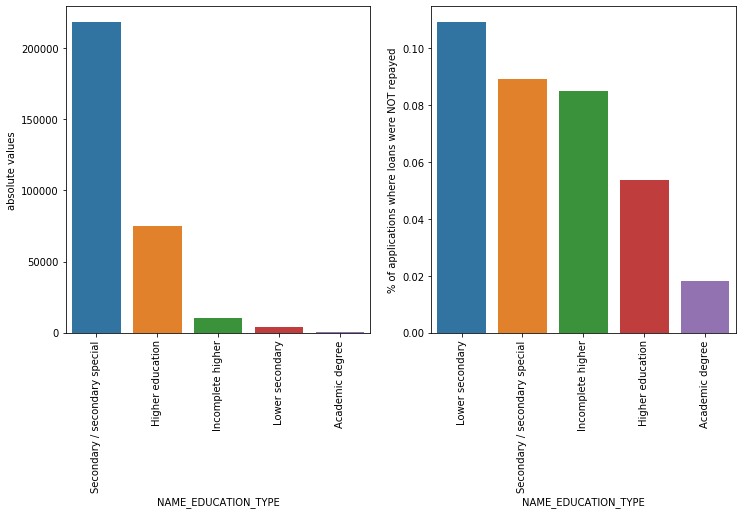

In [130]:
plot_univariate('NAME_EDUCATION_TYPE',True)

- We can see people with lower secondary education have higher chances of having difficulty while repaying the loan followed by secondary/secondary special, which is also the most taken loan type.

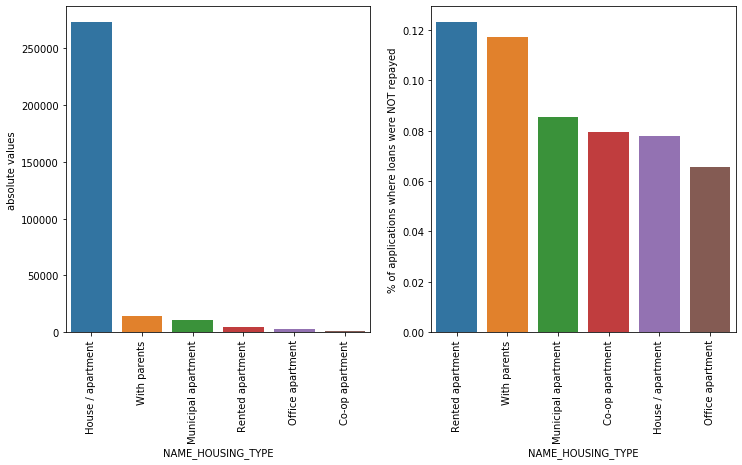

In [131]:
plot_univariate('NAME_HOUSING_TYPE',True,True)

- More no. of loans are being taken by the people having house or living in an apartment. 
- People who live in a rented house or with parents face difficulty paying the loans.

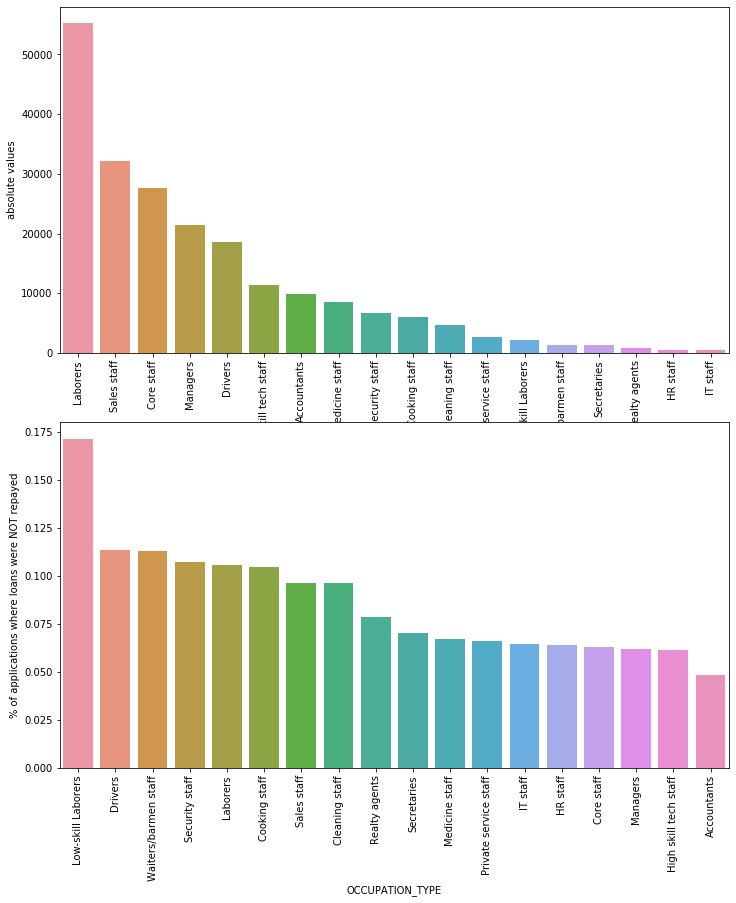

In [133]:
plot_univariate('OCCUPATION_TYPE',True,False)

- More laborers are applying for loans.
- Low-skill labourers have higher chances of being defaulters then comes, drivers,waiters/barmen staff,security staff,laborers etc. who do not have good income.

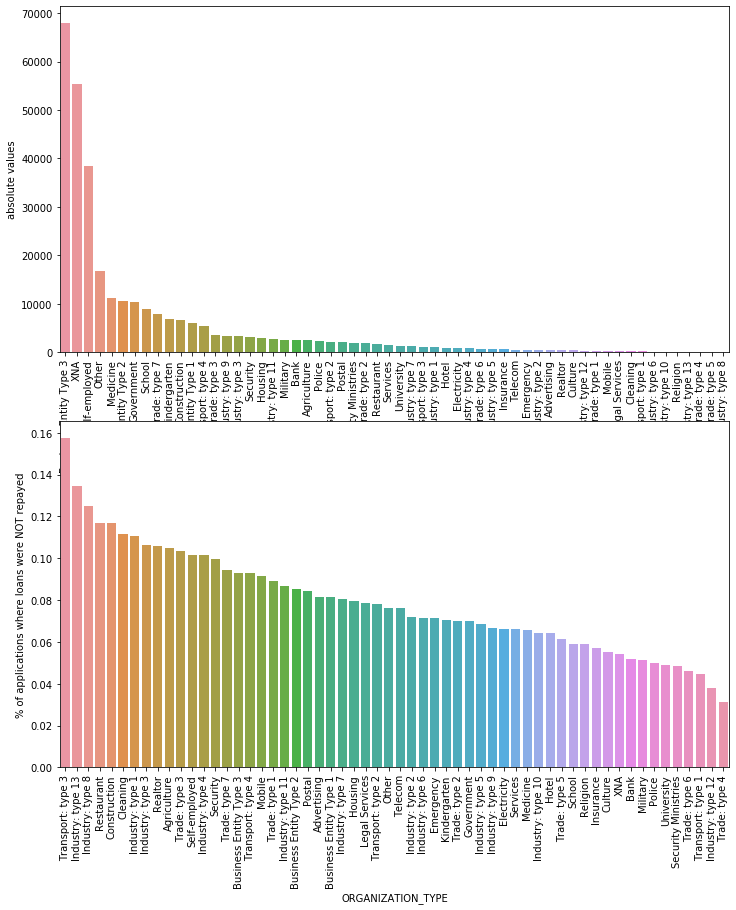

In [134]:
plot_univariate('ORGANIZATION_TYPE',True,False)

- Transport: type 3 are having higher chances of being defaulters and Trade: type 4 are having least chances of being defaulters

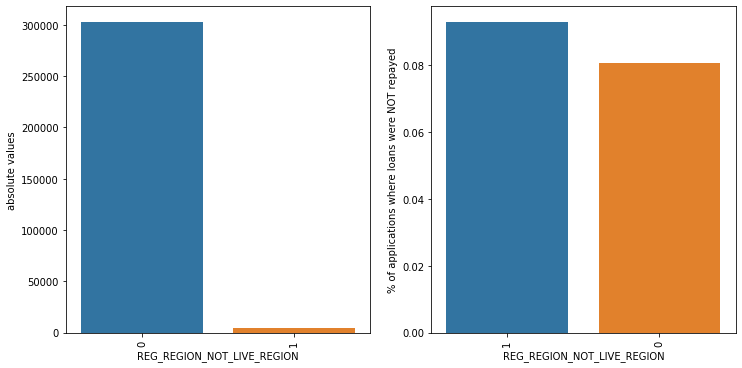

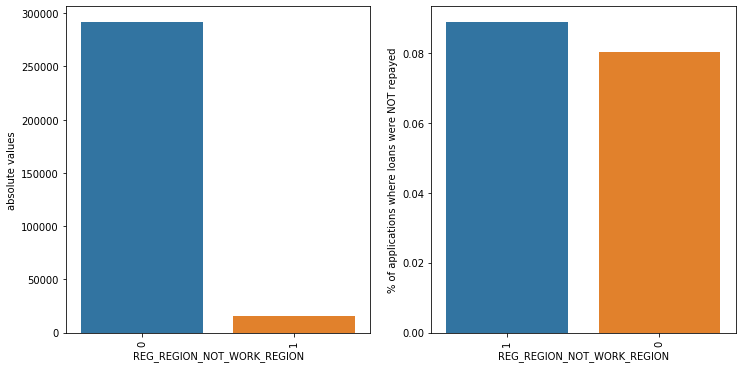

In [135]:
plot_univariate('REG_REGION_NOT_LIVE_REGION',True,True)
plot_univariate('REG_REGION_NOT_WORK_REGION',True,True)

- People whose work region and live region do not match registered rewgion have higher chances of becomin defaulters

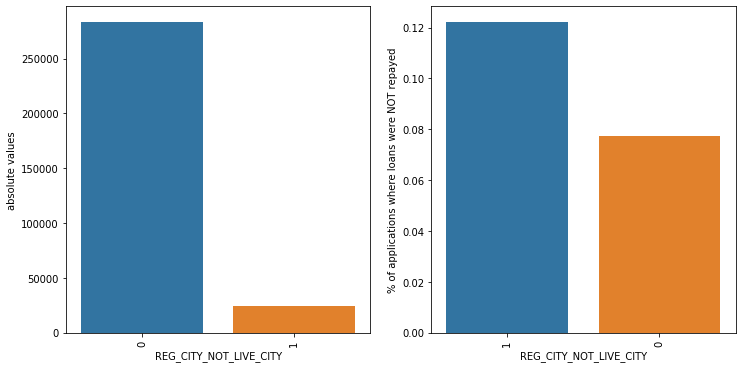

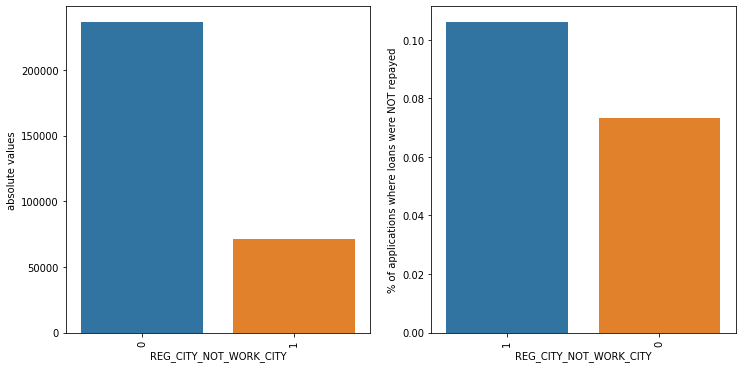

In [136]:
plot_univariate('REG_CITY_NOT_LIVE_CITY',True,True)
plot_univariate('REG_CITY_NOT_WORK_CITY',True,True)

- People whose work city or live city do not match registered city have higher chances of becoming defaulters

In [143]:
target0_df_copy=df_copy.loc[df_copy["TARGET"]==0]
target1_df_copy=df_copy.loc[df_copy["TARGET"]==1]

In [186]:
def plot_bivariate(dataframe,column,title,hue=None):
    fig, ax = plt.subplots()
    width = len(dataframe[column].unique())
    fig.set_size_inches(width , 6)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = dataframe, x= column, order=dataframe[column].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

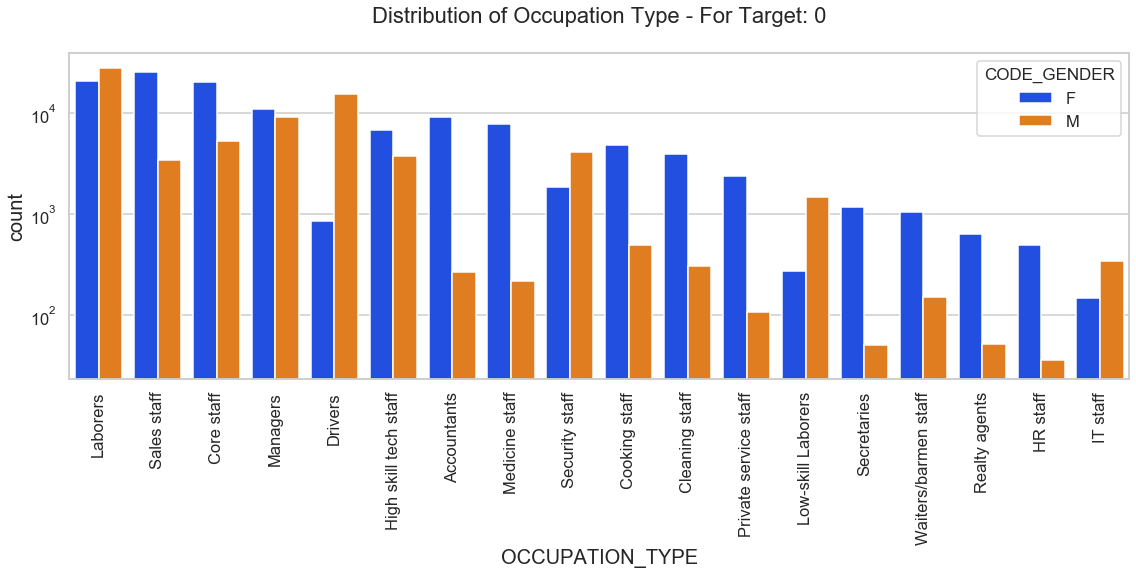

In [187]:
plot_bivariate(dataframe=target0_df_copy,column='OCCUPATION_TYPE',title='Distribution of Occupation Type - For Target: 0',hue='CODE_GENDER')

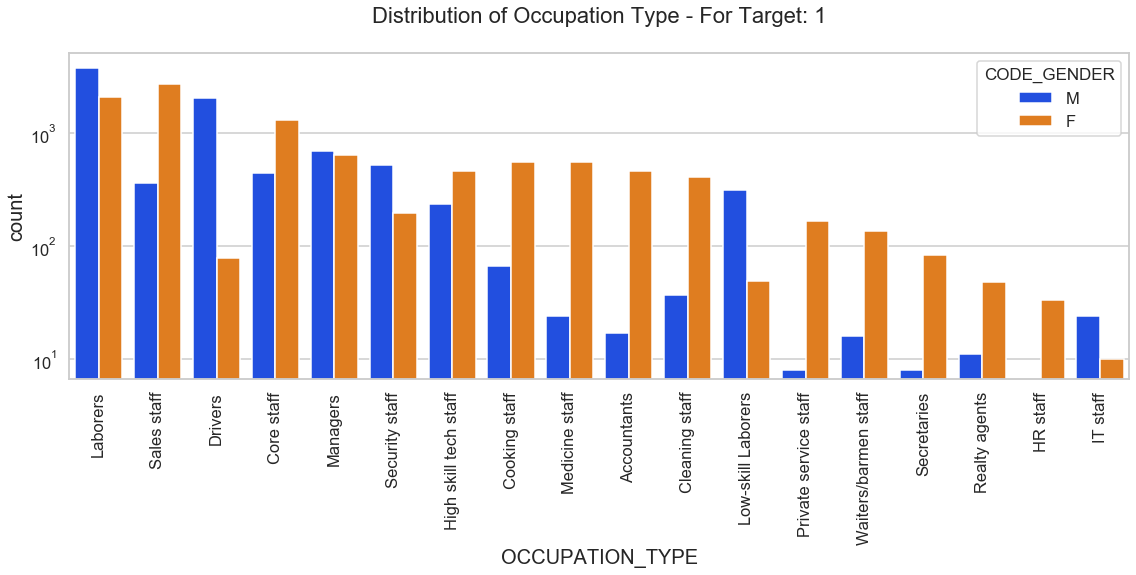

In [189]:
plot_bivariate(dataframe=target1_df_copy,column='OCCUPATION_TYPE',title='Distribution of Occupation Type - For Target: 1',hue='CODE_GENDER')

- Men under the occupation type: Private service staff,Waiters/barmen,secretaries,realty agents,accountants are having lesser chances of being defaulters.
- Female cooking staff,medical staff,cleaning staff,accountants have higher chances of being defaulters compared to their counterparts. 
- Male low-skill labourers and drivers have higher chances of being defaulters compared to their respective counterparts.
- Female sales staffs are risky and have higher chances of being defaulters compared to their respective counterparts.

- From the univariate and bivariate analysis we can conclude that male accountants are the safest ones.

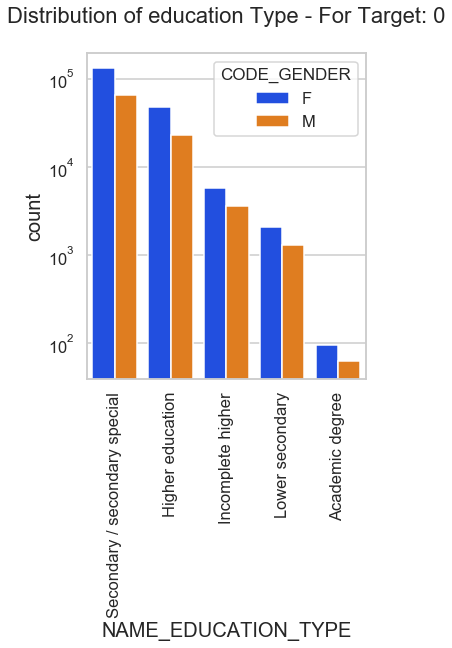

In [190]:
plot_bivariate(dataframe=target0_df_copy,column='NAME_EDUCATION_TYPE',title='Distribution of education Type - For Target: 0',hue='CODE_GENDER')

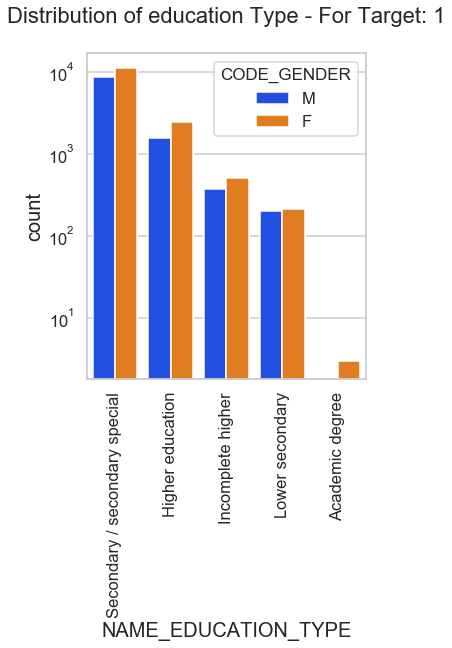

In [191]:
plot_bivariate(dataframe=target1_df_copy,column='NAME_EDUCATION_TYPE',title='Distribution of education Type - For Target: 1',hue='CODE_GENDER')

- Nothing much useful can be concluded

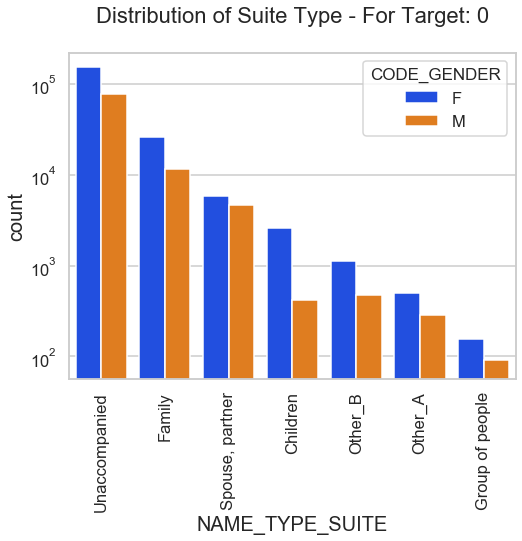

In [195]:
plot_bivariate(dataframe=target0_df_copy,column='NAME_TYPE_SUITE',title='Distribution of Suite Type - For Target: 0',hue='CODE_GENDER')

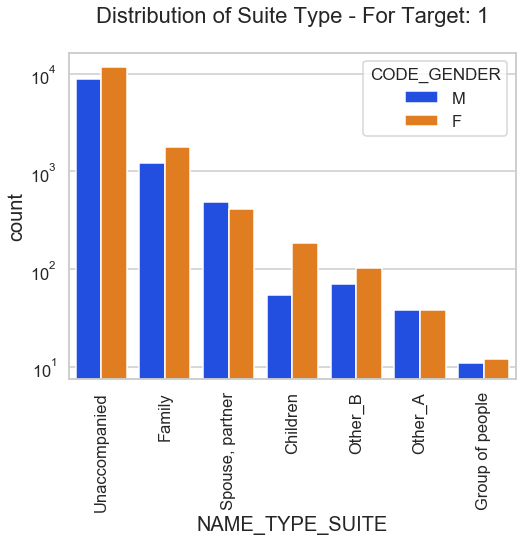

In [196]:
plot_bivariate(dataframe=target1_df_copy,column='NAME_TYPE_SUITE',title='Distribution of Suite Type - For Target: 1',hue='CODE_GENDER')

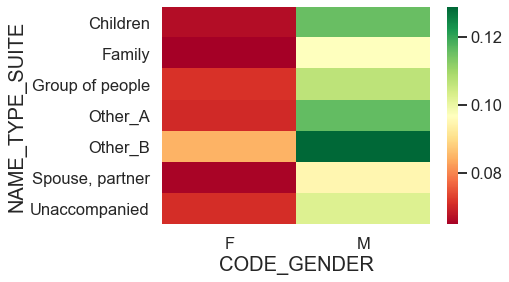

In [198]:
res = pd.pivot_table(data=df_copy, index='NAME_TYPE_SUITE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

- Acc. to barplot, female with children are more defaulters compared to male with children but acc. to heatmap male with children are more defaulters

In [221]:
target1_df_copy['NAME_TYPE_SUITE'].groupby(target1_df_copy['CODE_GENDER']).value_counts()

CODE_GENDER  NAME_TYPE_SUITE
F            Unaccompanied      11593
             Family              1779
             Spouse, partner      412
             Children             186
             Other_B              104
             Other_A               38
             Group of people       12
M            Unaccompanied       8744
             Family              1230
             Spouse, partner      483
             Other_B               70
             Children              55
             Other_A               38
             Group of people       11
Name: NAME_TYPE_SUITE, dtype: int64

- From this calculation we can conclude that female with children are having higher chances of being defaulters

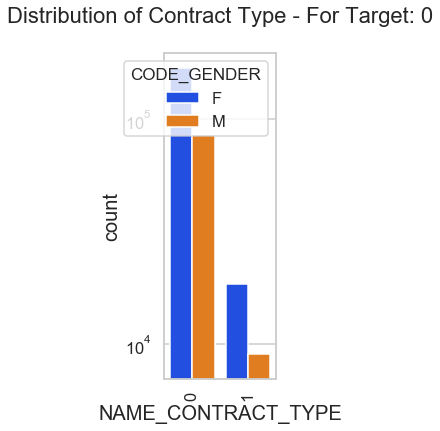

In [222]:
plot_bivariate(dataframe=target0_df_copy,column='NAME_CONTRACT_TYPE',title='Distribution of Contract Type - For Target: 0',hue='CODE_GENDER')

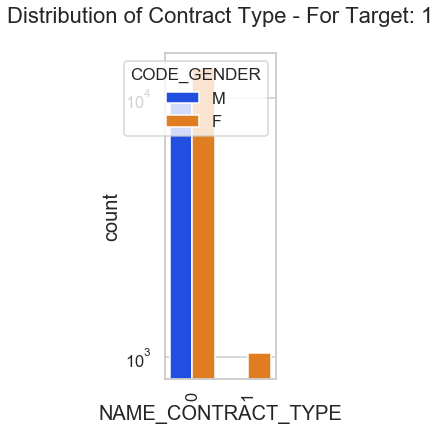

In [223]:
plot_bivariate(dataframe=target1_df_copy,column='NAME_CONTRACT_TYPE',title='Distribution of Contract Type - For Target: 1',hue='CODE_GENDER')

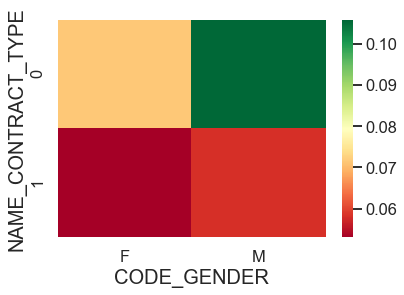

In [225]:
res = pd.pivot_table(data=df_copy, index='NAME_CONTRACT_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

- Males with cash loans have higher cances of being defaulters 
- Females with cash loan have slightly higher chances of being defaulters acc. to the countplot above. 
(Above 2 statements are contradictory, so not able to come to a conclusion)
